In [1]:
from random import randrange
import matplotlib.pyplot as plt
import numpy as np
from time import time

# Quick Sort

In [2]:
def quicksort(A, p, r):
    A = A.copy()
    if p < r:
        A, q = partition(A, p, r)
        A = quicksort(A, p, q-1)
        A = quicksort(A, q+1, r)
    return A

def partition(A, p, r):
    x = A[r]
    i = p-1
    for j in range(p, r):
        if A[j] <= x:
            i += 1
            A[i], A[j] = A[j], A[i]
    A[i+1], A[r] = A[r], A[i+1]
    return A, i+1

# Insertion Sort

In [3]:
def insertion_sort(A):
    A = A.copy()
    for j in range(1, len(A)):
        key = A[j]
        i = j - 1
        while i >= 0 and A[i] > key:
            A[i+1] = A[i]
            i -= 1 
        A[i+1] = key
    return A

# Bucket Sort

In [4]:
def bucket_sort(A):
    A = A.copy()
    n = len(A)
    A = [A[i]/100 for i in range(n)]
    B = [[] for _ in range(10)]
    for i in range(n):
        B[int(A[i]*10)].append(A[i])
    B_concat = []
    for i in range(10):
        B_concat += insertion_sort(B[i])
    B_concat = [int(B_concat[i]*100) for i in range(n)]
    return B_concat

# Counting Sort

In [5]:
def counting_sort(A):
    A = A.copy()
    B = [float('nan') for _ in range(len(A))]
    k = max(A)
    C = [0 for _ in range(k+1)]
    for j in range(len(A)):
        C[A[j]] += 1
    for i in range(1, k+1):
        C[i] += C[i-1]
    for j in range(len(A)-1, -1, -1):
        B[C[A[j]]-1] = A[j]
        C[A[j]] -= 1
    return B

def counting_sort_mod(A, I):
    A = A.copy()
    B = np.empty(A.shape, dtype=np.int)
    B[:] = np.nan
    k = np.max(A[:, I])
    C = [0 for _ in range(k+1)]
    for j in range(len(A)):
        C[A[j, I]] += 1
    for i in range(1, k+1):
        C[i] += C[i-1]
    for j in range(len(A)-1, -1, -1):
        B[C[A[j, I]]-1] = A[j]
        C[A[j, I]] -= 1
    return B

# Radix Sort

In [6]:
def radix_sort(A):
    A = A.copy()
    d = len(str(max(A)))
    A_new = []
    for n in range(len(A)):
        A_new.append([])
        number = str(A[n]).zfill(d)
        for m in range(d):
            A_new[n].append(int(number[m]))
    A_new = np.array(A_new)
    for i in range(d-1, -1, -1):
        A_new = counting_sort_mod(A_new, i)
    for i in range(1, d):
        A_new[:, -i-1] *= 10**(i)
    A = 0
    for i in range(d):
        A += A_new[:, i]
    return A

In [7]:
A = [randrange(99) for _ in range(100)]

print('Input:')
print(A)

Input:
[78, 2, 66, 80, 64, 27, 15, 23, 47, 73, 94, 59, 57, 21, 47, 72, 52, 61, 19, 5, 49, 60, 13, 72, 48, 35, 40, 0, 18, 65, 63, 16, 39, 57, 80, 70, 3, 56, 52, 62, 14, 86, 34, 48, 44, 81, 95, 73, 93, 7, 42, 42, 58, 61, 15, 11, 91, 59, 15, 35, 19, 18, 66, 5, 49, 69, 44, 85, 13, 54, 3, 22, 36, 25, 21, 8, 28, 31, 14, 32, 70, 98, 94, 4, 6, 42, 58, 54, 20, 77, 60, 81, 58, 68, 69, 62, 24, 16, 0, 84]


In [8]:
sorted_A = bucket_sort(A)

print('Sorted by bucket sort algorithm:')
print(sorted_A)

Sorted by bucket sort algorithm:
[0, 0, 2, 3, 3, 4, 5, 5, 6, 7, 8, 11, 13, 13, 14, 14, 15, 15, 15, 16, 16, 18, 18, 19, 19, 20, 21, 21, 22, 23, 24, 25, 27, 28, 31, 32, 34, 35, 35, 36, 39, 40, 42, 42, 42, 44, 44, 47, 47, 48, 48, 49, 49, 52, 52, 54, 54, 56, 56, 56, 57, 57, 57, 59, 59, 60, 60, 61, 61, 62, 62, 63, 64, 65, 66, 66, 68, 69, 69, 70, 70, 72, 72, 73, 73, 77, 78, 80, 80, 81, 81, 84, 85, 86, 91, 93, 94, 94, 95, 98]


In [9]:
sorted_A = radix_sort(A)

print('Sorted by radix sort algorithm:')
print(sorted_A)

Sorted by radix sort algorithm:
[ 0  0  2  3  3  4  5  5  6  7  8 11 13 13 14 14 15 15 15 16 16 18 18 19
 19 20 21 21 22 23 24 25 27 28 31 32 34 35 35 36 39 40 42 42 42 44 44 47
 47 48 48 49 49 52 52 54 54 56 57 57 58 58 58 59 59 60 60 61 61 62 62 63
 64 65 66 66 68 69 69 70 70 72 72 73 73 77 78 80 80 81 81 84 85 86 91 93
 94 94 95 98]


In [10]:
t_quick = []
t_bucket = []
t_radix = []
n = [int(10**((n+2)/4)) for n in range(12)]

for i in range(len(n)):
    A = [randrange(99) for _ in range(n[i])]
    
    t0 = time()
    sorted_A = quicksort(A, 0, len(A)-1)
    t_quick.append((time()-t0)*1000)
    
    t0 = time()
    sorted_A = bucket_sort(A)
    t_bucket.append((time()-t0)*1000)
    
    t0 = time()
    sorted_A = radix_sort(A)
    t_radix.append((time()-t0)*1000)

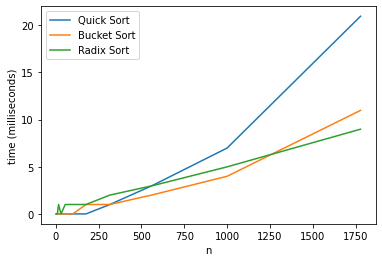

In [11]:
plt.plot(n, t_quick, label='Quick Sort')
plt.plot(n, t_bucket, label='Bucket Sort')
plt.plot(n, t_radix, label='Radix Sort')
plt.xlabel('n')
plt.ylabel('time (milliseconds)')
plt.legend()
plt.show()